<h1 align='center' style='color:purple'>Clustering With K Means - Python Tutorial</h1>

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


In [7]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [8]:
bin(1600000)

'0b110000110101000000000'

Text(0, 0.5, 'Income($)')

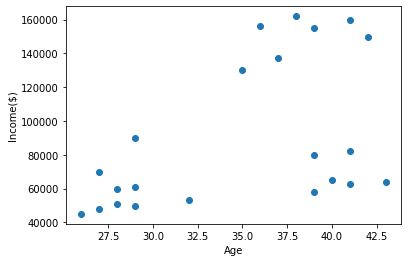

In [10]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [11]:
from sklearn.cluster import KMeans

In [12]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [13]:
km.fit(df[['Age','Income($)']])

KMeans(n_clusters=3)

In [ ]:
# km.fit_predict(df[['Age','Income($)']])

In [14]:
y_predicted = km.predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [15]:
km.inertia_

1577046058.883117

In [16]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [9]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [17]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
print(len(df0),len(df1),len(df2))

4 7 11


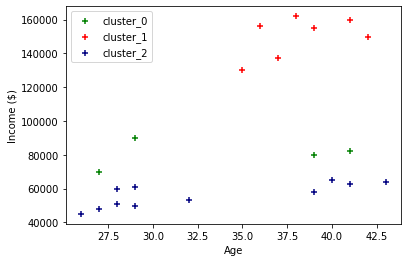

In [18]:

plt.scatter(df0.Age,df0['Income($)'],color='green',marker="+",label='cluster_0')
plt.scatter(df1.Age,df1['Income($)'],color='red',marker="+",label='cluster_1')
plt.scatter(df2.Age,df2['Income($)'],color='navy',marker="+",label='cluster_2')
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [21]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


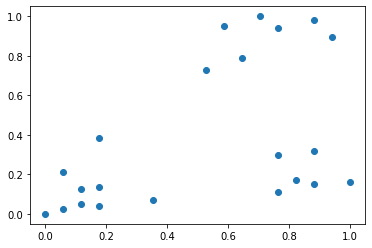

In [22]:
plt.scatter(df.Age,df['Income($)'])

In [23]:
km1 = KMeans(n_clusters=3)
y_predicted = km1.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [24]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [25]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

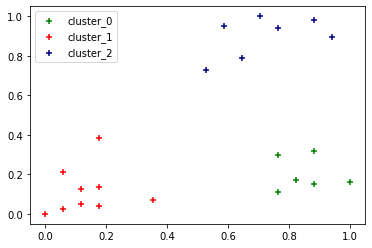

In [26]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
plt.scatter(df0.Age,df0['Income($)'],color='green',marker="+",label='cluster_0')
plt.scatter(df1.Age,df1['Income($)'],color='red',marker="+",label='cluster_1')
plt.scatter(df2.Age,df2['Income($)'],color='navy',marker="+",label='cluster_2')
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [27]:
km.inertia_# it is the sum of squared error in k means clustering

1577046058.883117

<h4 style='color:purple'>Elbow Plot</h4>

In [30]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

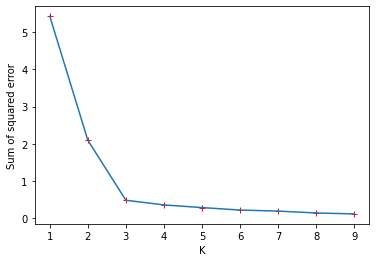

In [34]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse,'r+')
plt.plot(k_rng,sse)

<h4 style='color:purple'>Exercise</h4>

<img src='iris.png' width=200 height=200>

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k

### Exercise 2

Train k-means using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then,


* . Use 80% of samples as training data size